## Цель ноутбука

Построить и обучить модель распознавания рукописных цифр.

Решим нашу первую задачу компьютерного зрения — задачу классификации на датасете рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology).

### 1. Устанавливаем и импортируем необходимые библиотеки

In [ ]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task

### 2. Загружаем датасет

In [ ]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(f'Images type: {type(digits.images)}', f'Target type: {type(digits.target)}', sep='\n')
print(f'Images shape: {digits.images.shape}', f'Target shape: {digits.target.shape}', sep='\n')

Images type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Images shape: (1797, 8, 8)
Target shape: (1797,)


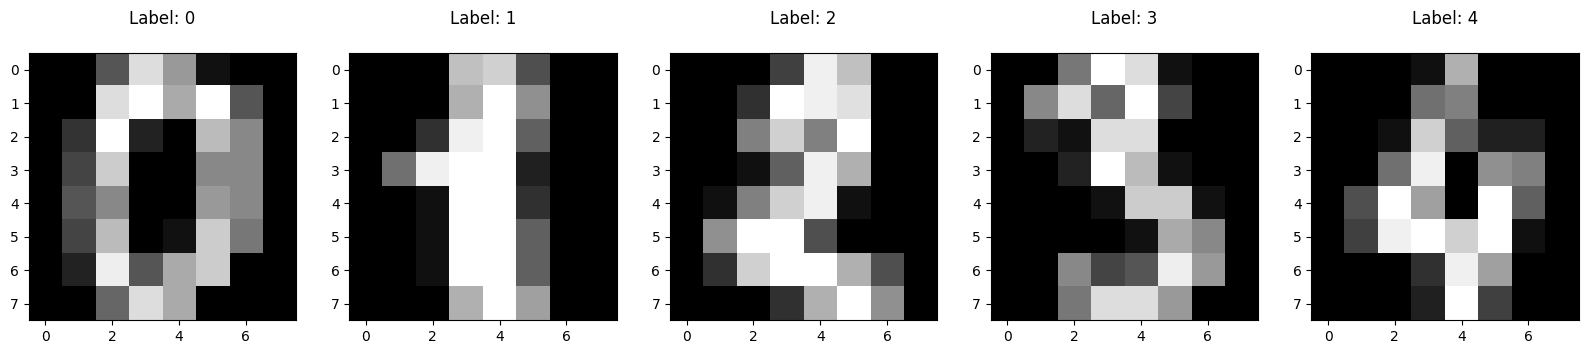

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,4))
for i in range(5):
    axs[i].imshow(digits.images[i], cmap='gray')
    axs[i].set_title('Label: %i\n' % digits.target[i])

### 3. Готовим данные

Вы отлично знаете, как решать задачу классификации, однако привычные иксы представляют собой вектор признаков, или фич, а здесь — картинки, матрицы размера 8 × 8. Чтобы воспользоваться одним из знакомых вам методов, давайте воспринимать каждый пиксель как отдельный признак, тогда их можно будет представить и в виде вектора — вытянуть. К счастью, нам даже не придётся делать это руками, ведь авторы библиотеки `sklearn` уже сделали это за нас. Посмотрим на `digits.data`.

In [ ]:
print('Shape of images as feature vectors:', digits.data.shape)

Shape of images as feature vectors: (1797, 64)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.25, random_state=0,
    stratify=digits.target
)

for split, target in zip(['Train', 'Test'], [y_train, y_test]):
    unique, counts = np.unique(target, return_counts=True)
    print(f'{split}:')
    for a, b in zip(unique, counts):
        print(f'{a}: {b}')
    print()

Train:
0: 133
1: 136
2: 133
3: 137
4: 136
5: 136
6: 136
7: 134
8: 131
9: 135

Test:
0: 45
1: 46
2: 44
3: 46
4: 45
5: 46
6: 45
7: 45
8: 43
9: 45



### 4. Обучаем и тестируем модель

Предлагаем выбрать логистическую регрессию. Вы также можете попробовать обучить другие знакомые вам методы на этом датасете.
Датасет близок к сбалансированному, поэтому для тестирования модели посмотрим на точность и на матрицу ошибок.

In [ ]:
clf = LogisticRegression(
    max_iter=10000
)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

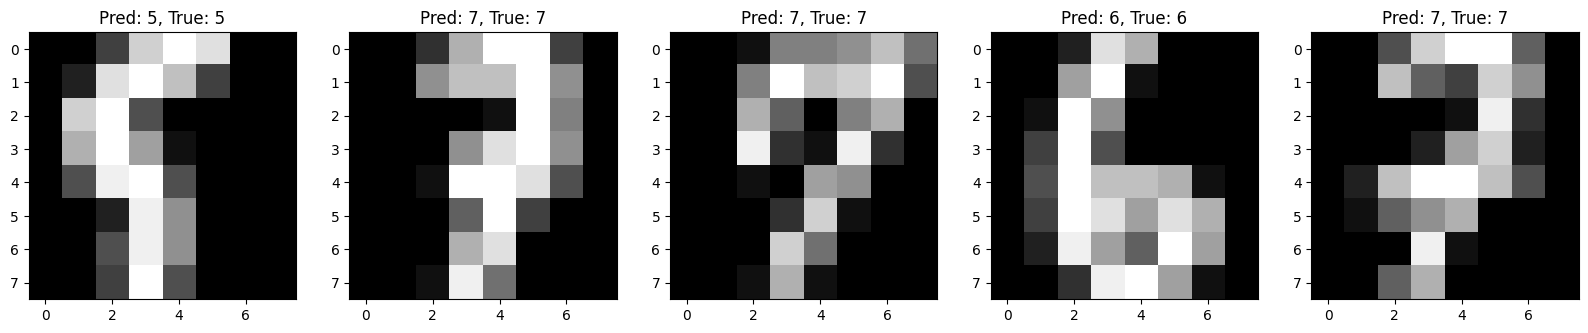

In [ ]:
test_idx = np.random.choice(X_test.shape[0], 5)
y_pred = clf.predict(X_test[test_idx])

fig, axs = plt.subplots(1, 5, figsize=(20,12))
for i, idx in enumerate(test_idx):
    axs[i].imshow(X_test[idx].reshape(8, 8), cmap='gray')
    axs[i].set_title(f'Pred: {y_pred[i]}, True: {y_test[idx]}')

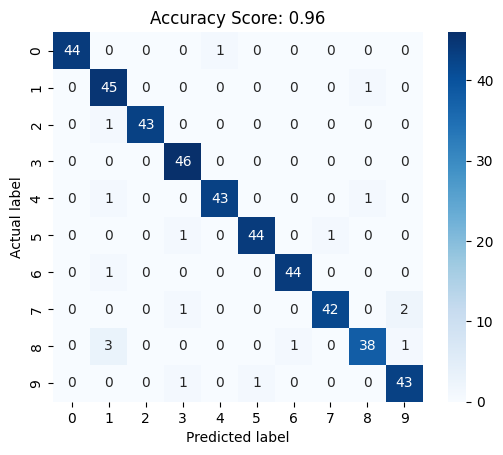

In [ ]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, square=True, cmap='Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {acc:.2f}')
plt.show()